### Bike Sharing Demand dataset


Forecast use of a city bikeshare system

https://www.kaggle.com/competitions/bike-sharing-demand/overview

Inspiration: https://www.kaggle.com/code/werooring/ch6-eda


#### Data Fields

- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather:
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### EDA

In [67]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [61]:
train_df.head(4)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13


In [62]:
train_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [69]:
def split_datetime(df):
    dt_column = df['datetime']
    seconds = dt_column.second
    minutes = dt_column.minute
    hours = dt_column.hour
    days = dt_column.day
    monthes = dt_column.month
    years = dt_column.year
    weekdays = dt_column.dayofweek
    return (seconds, minutes, hours, days, monthes, years, weekdays)

In [70]:
train_df['datetime'] = pd.to_datetime(train_df['datetime'])
test_df['datetime'] = pd.to_datetime(test_df['datetime'])

train_df[['second', 'minute', 'hour', 'day', 'month', 'year', 'weekday']] = train_df.apply(split_datetime, axis=1, result_type="expand")
test_df[['second', 'minute', 'hour', 'day', 'month', 'year', 'weekday']] = test_df.apply(split_datetime, axis=1, result_type="expand")


season_mapping = {1: 'Spring', 
                  2: 'Summer', 
                  3: 'Fall', 
                  4: 'Winter'}
weather_mapping = {1: 'Clear', 
                   2: 'Mist, Few clouds', 
                   3: 'Light Snow, Rain, Thunder',
                   4: 'Heavy Snow, Rain, Thunder'}
weekday_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 
                   3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}


train_df['season_str'] = train_df['season'].map(season_mapping)
train_df['weather_str'] = train_df['weather'].map(weather_mapping)
test_df['season_str'] = test_df['season'].map(season_mapping)
test_df['weather_str'] = test_df['weather'].map(weather_mapping)

train_df['weekday_str'] = train_df['weekday'].map(weekday_mapping)
test_df['weekday_str'] = test_df['weekday'].map(weekday_mapping)

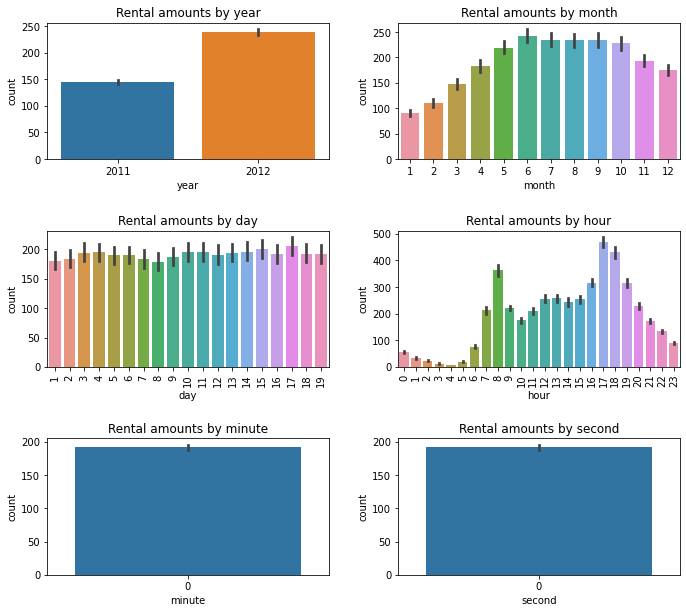

In [53]:
figure, axes = plt.subplots(nrows=3, ncols=2) 
plt.tight_layout()            
figure.set_size_inches(10, 9) 

sns.barplot(x='year', y='count', data=train_df, ax=axes[0, 0])
sns.barplot(x='month', y='count', data=train_df, ax=axes[0, 1])
sns.barplot(x='day', y='count', data=train_df, ax=axes[1, 0])
sns.barplot(x='hour', y='count', data=train_df, ax=axes[1, 1])
sns.barplot(x='minute', y='count', data=train_df, ax=axes[2, 0])
sns.barplot(x='second', y='count', data=train_df, ax=axes[2, 1])

axes[0, 0].set(title='Rental amounts by year')
axes[0, 1].set(title='Rental amounts by month')
axes[1, 0].set(title='Rental amounts by day')
axes[1, 1].set(title='Rental amounts by hour')
axes[2, 0].set(title='Rental amounts by minute')
axes[2, 1].set(title='Rental amounts by second')

axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

### Outcomes
- There is only hourly data (no need for second/minute analysis)
- Almost no one takes bikes during night time
- Winter monthes seem to be less interesting for bikes
- Train data contains first 20 days of a month, the rest is in a test set

---

<AxesSubplot:xlabel='hour', ylabel='count'>

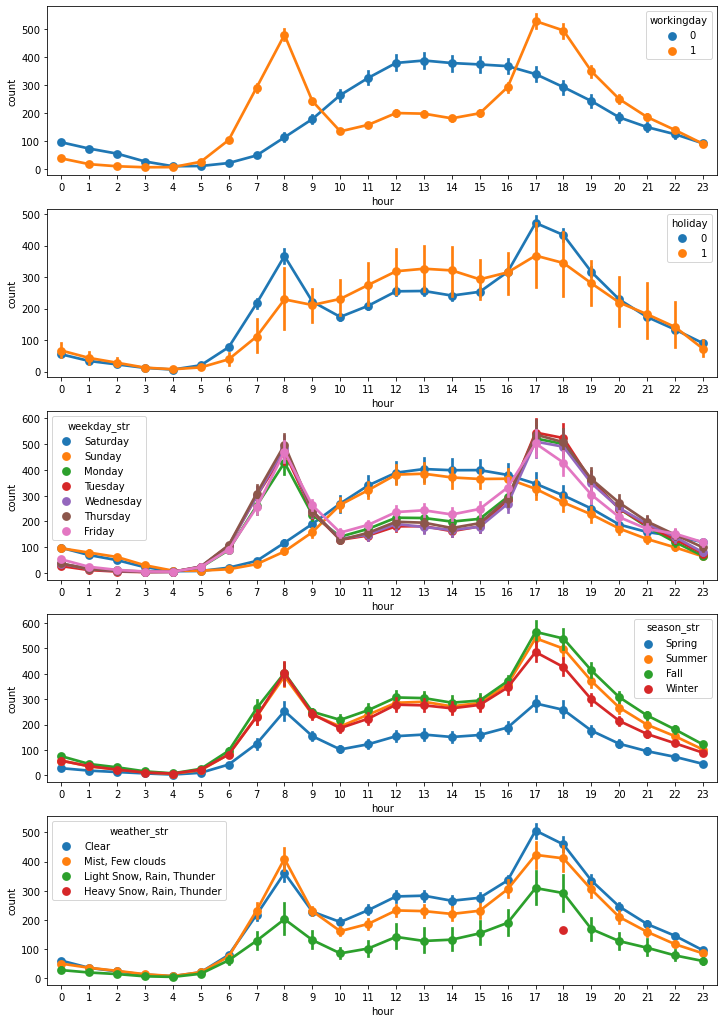

In [73]:
figure, axes = plt.subplots(nrows=5)
figure.set_size_inches(12, 18)

sns.pointplot(x='hour', y='count', data=train_df, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=train_df, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train_df, hue='weekday_str', ax=axes[2])
sns.pointplot(x='hour', y='count', data=train_df, hue='season_str', ax=axes[3])
sns.pointplot(x='hour', y='count', data=train_df, hue='weather_str', ax=axes[4])